In [1]:
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Downloads/creditcard.csv", encoding="utf-8")  

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


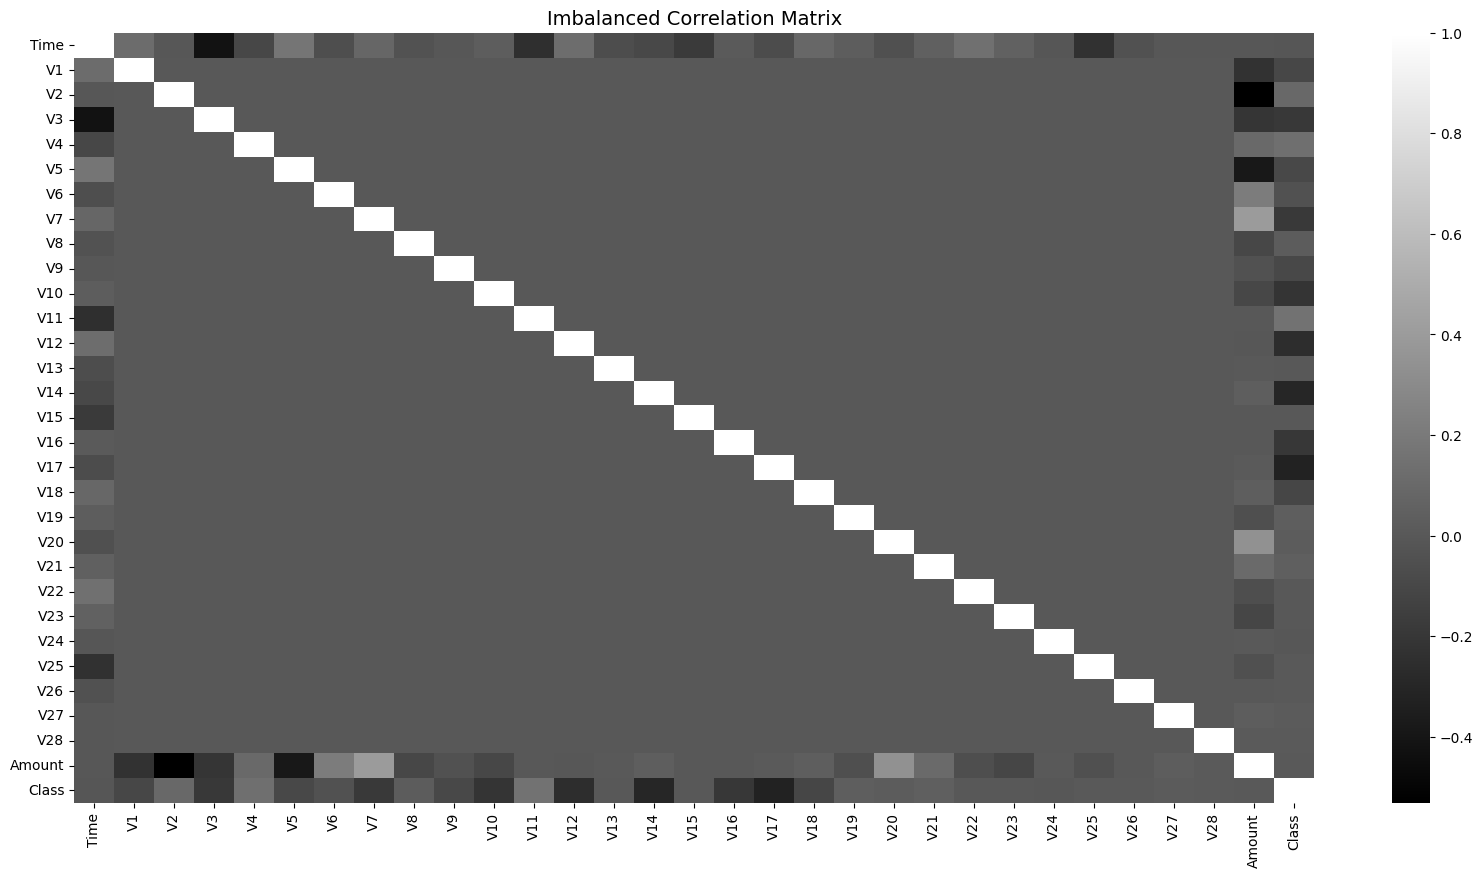

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr, cmap="gray", ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

<AxesSubplot: xlabel='Class', ylabel='count'>

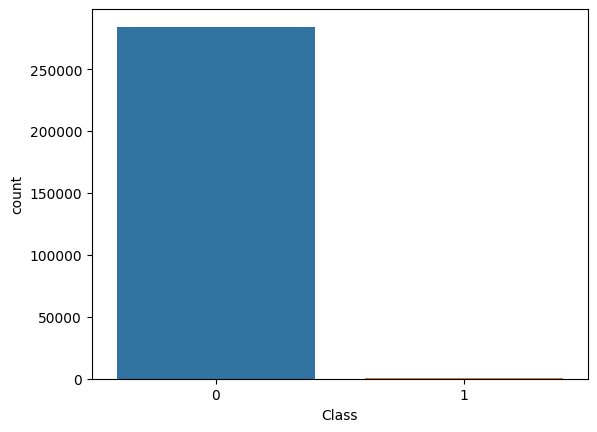

In [6]:
sns.countplot(x='Class',data=df)

In [7]:
sm = SMOTE(sampling_strategy='minority', random_state=7)
resampled_X, resampled_Y = sm.fit_resample(df.drop('Class', axis=1), df['Class'])
oversampled_df = pd.concat([pd.DataFrame(resampled_X), pd.DataFrame(resampled_Y)], axis=1)
oversampled_df.columns = df.columns
oversampled_df['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

<AxesSubplot: xlabel='Class', ylabel='count'>

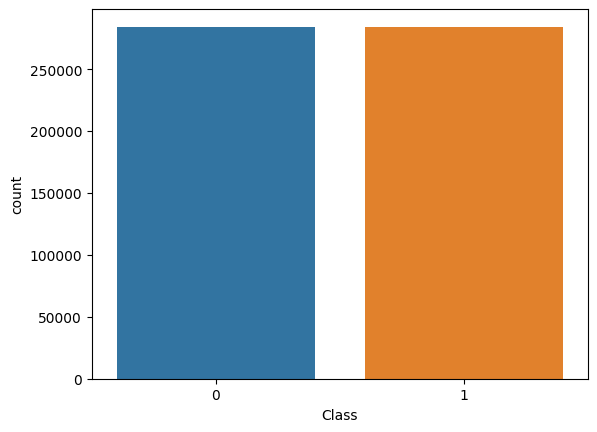

In [8]:
sns.countplot(x='Class', data=oversampled_df)

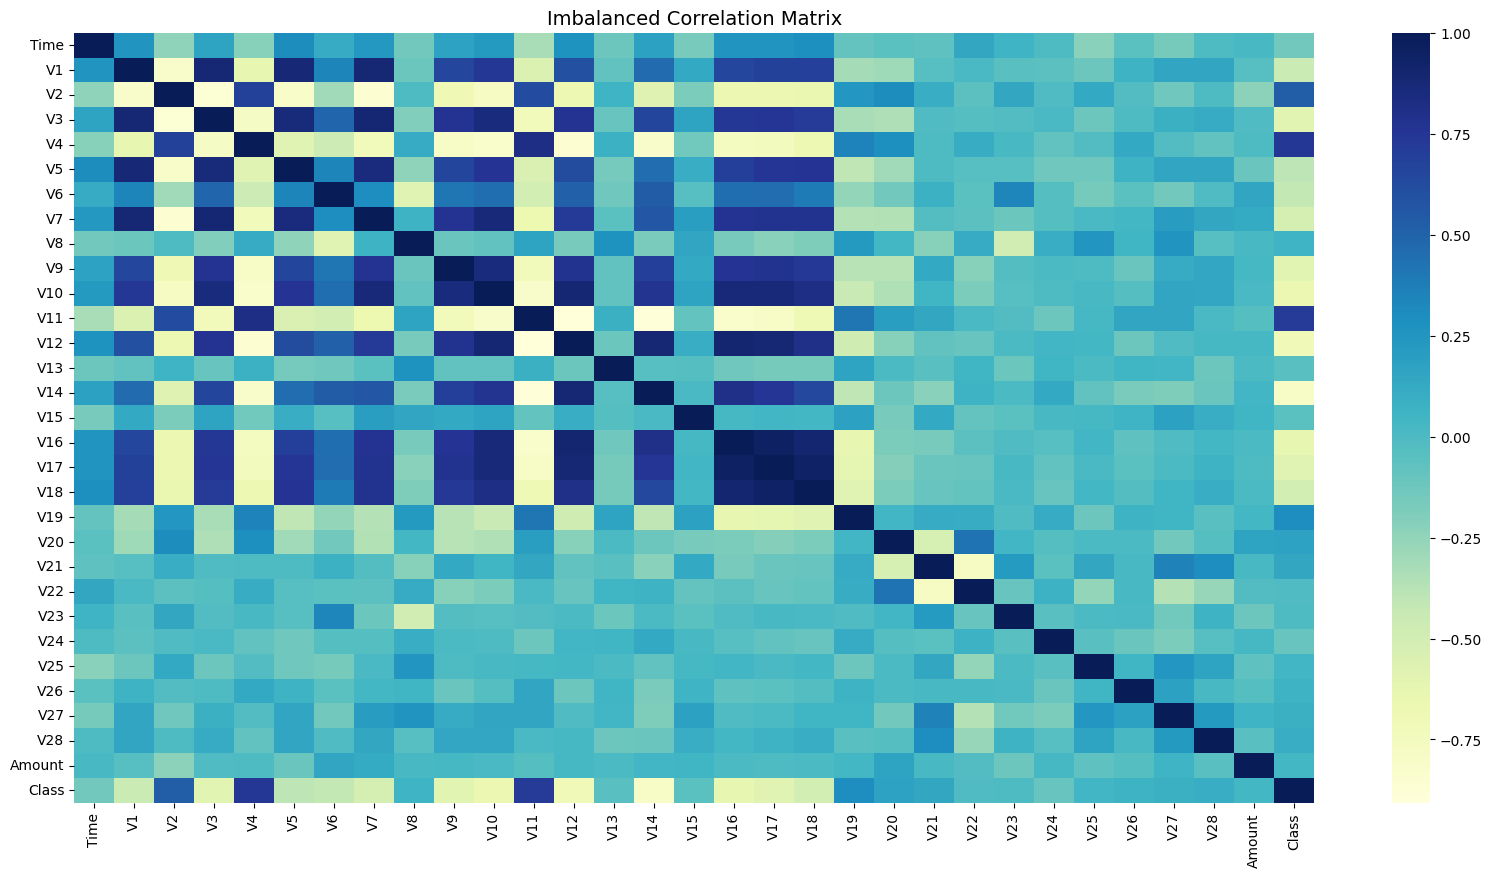

In [9]:
fig, ax = plt.subplots(figsize=(20,10))         
corr = oversampled_df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [10]:
sc = StandardScaler()
X = oversampled_df.iloc[:, 1:-1].values
y = oversampled_df.iloc[:, -1].values
y = y.reshape(-1, 1)
print(X.shape, y.shape)

X = sc.fit_transform(X)
print(X[0])

(568630, 29) (568630, 1)
[ 0.20495125 -0.54573636  1.0045184  -0.30168224  0.31098779  0.6920209
  0.55516986 -0.03644768  0.76125221  0.67923829 -0.92061643  0.57128753
 -0.94634073  0.71704508  1.64724241  0.48636415  0.62706212  0.50679008
  0.04977222  0.06379384 -0.14589103  0.24649907 -0.10441593  0.22564242
  0.16596895 -0.48756152  0.05492719 -0.14984388  0.2455859 ]


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0005)

In [13]:
x_features = X.shape[1]
y_features = y.shape[1]

In [14]:
i = Input(shape=(x_features,))

x = Dense(64, activation='relu')(i)
x = Dense(64, activation='relu')(x)
o = Dense(y_features, activation='sigmoid')(x)

model = Model(i,o)
model.compile(loss="binary_crossentropy", metrics=['accuracy'], optimizer=adam)
print(model.summary())
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 64)                1920      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,145
Trainable params: 6,145
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
r = model.fit(x_train, y_train, epochs=100, batch_size=512, verbose=1, validation_data=(x_test, y_test), callbacks=[callback])

Epoch 1/100
778/778 [==============================] - 3s 3ms/step - loss: 0.1210 - accuracy: 0.9533 - val_loss: 0.0471 - val_accuracy: 0.9827
Epoch 2/100
778/778 [==============================] - 2s 3ms/step - loss: 0.0329 - accuracy: 0.9888 - val_loss: 0.0241 - val_accuracy: 0.9928
Epoch 3/100
778/778 [==============================] - 2s 3ms/step - loss: 0.0193 - accuracy: 0.9946 - val_loss: 0.0155 - val_accuracy: 0.9961
Epoch 4/100
778/778 [==============================] - 2s 3ms/step - loss: 0.0131 - accuracy: 0.9968 - val_loss: 0.0113 - val_accuracy: 0.9972
Epoch 5/100
778/778 [==============================] - 2s 3ms/step - loss: 0.0095 - accuracy: 0.9979 - val_loss: 0.0085 - val_accuracy: 0.9980
Epoch 6/100
778/778 [==============================] - 2s 3ms/step - loss: 0.0073 - accuracy: 0.9984 - val_loss: 0.0068 - val_accuracy: 0.9985
Epoch 7/100
778/778 [==============================] - 2s 3ms/step - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.0055 - val_accuracy: 0.9988

In [16]:
results = model.evaluate(x_test, y_test, batch_size=5, verbose=1)
print("Loss: %.2f" % results[0])
print("Acc: %.2f" % results[1])

34118/34118 [==============================] - 50s 1ms/step - loss: 0.0019 - accuracy: 0.9996
Loss: 0.00
Acc: 1.00


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


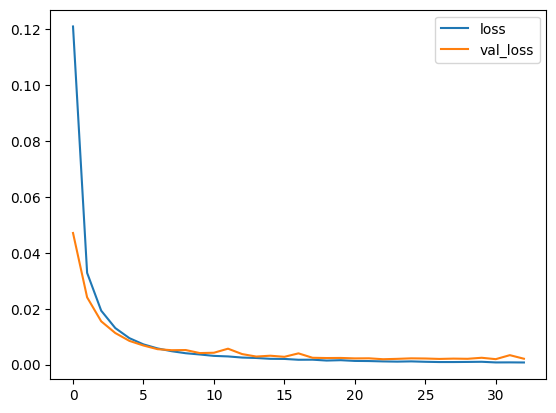

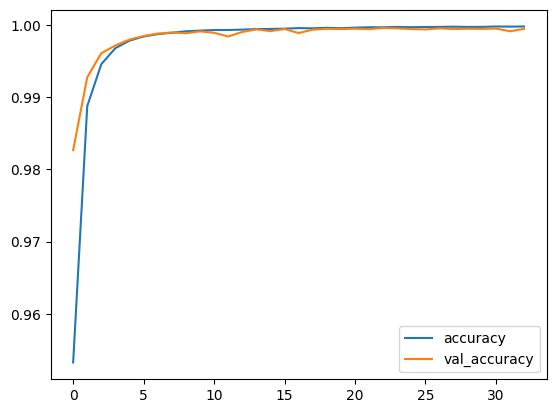

In [17]:
print(r.history.keys())
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [18]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred, decimals=0).astype(int)

5331/5331 [==============================] - 6s 1ms/step


In [19]:
df_pred = pd.concat([pd.DataFrame(x_test), pd.DataFrame(y_test)], axis=1)
df_pred.columns = df.drop('Time', axis=1).columns
df_pred.rename(columns={"Class":"Old_class"}, inplace=True)
df_pred['New_class'] = y_pred
cm = pd.crosstab(df_pred["New_class"], df_pred['Old_class'])
true_pos = np.sum(np.diag(cm))
false_pos = cm[0][1]
false_neg = cm[1][0]
precision = true_pos / (true_pos + false_pos) * 100
recall = true_pos / (true_pos + false_neg) * 100
f1 = 2 * (precision * recall) / (precision + recall)
print("Precision: %.3f%%" % (precision))
print("Recall: %.3f%%" % (recall))
print("F1: %.3f%%" % (f1))

Precision: 99.960%
Recall: 100.000%
F1: 99.980%
